In [1]:
# This notebook shows application of the following reinforcement learning ideas:
# - Policy Evaluation and Policy Improvement.
# - Value and Policy Iteration.
# - Bellman Equations.

In [2]:
# Mouseton City, a thriving metropolis with a booming technology industry, 
# has recently experienced an influx of grid-loving software engineers. 
# Unfortunately, the city's street parking system, which charges a fixed rate, 
# is struggling to keep up with the increased demand. To address this, 
# the city council has decided to modify the pricing scheme to better promote 
# social welfare. In general, the city considers social welfare higher when more 
# parking is being used, the exception being that the city prefers that at least 
# one spot is left unoccupied (so that it is available in case someone really 
# needs it). The city council has created a Markov decision process (MDP) to 
# model the demand for parking with a reward function that reflects its 
# preferences. Now the city has hired an expert in dynamic programming — 
# to help determine an optimal policy.

In [3]:
%matplotlib inline
import numpy as np
import tools

<Figure size 432x288 with 0 Axes>

In [4]:
# Let's consider an environment with three parking spaces and three price points. 
# Note that an environment with three parking spaces actually has four states 
# zero, one, two, or three spaces could be occupied.
num_spaces = 3
num_prices = 3
env = tools.ParkingWorld(num_spaces, num_prices)
V = np.zeros(num_spaces + 1)
pi = np.ones((num_spaces + 1, num_prices)) / num_prices

In [5]:
V

array([0., 0., 0., 0.])

In [6]:
pi

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [7]:
pi[0] = [0.75, 0.11, 0.14]

for s, pi_s in enumerate(pi):
    for a, p in enumerate(pi_s):
        print(f'pi(A={a}|S={s}) = {p.round(2)}    ', end='')
    print()

pi(A=0|S=0) = 0.75    pi(A=1|S=0) = 0.11    pi(A=2|S=0) = 0.14    
pi(A=0|S=1) = 0.33    pi(A=1|S=1) = 0.33    pi(A=2|S=1) = 0.33    
pi(A=0|S=2) = 0.33    pi(A=1|S=2) = 0.33    pi(A=2|S=2) = 0.33    
pi(A=0|S=3) = 0.33    pi(A=1|S=3) = 0.33    pi(A=2|S=3) = 0.33    


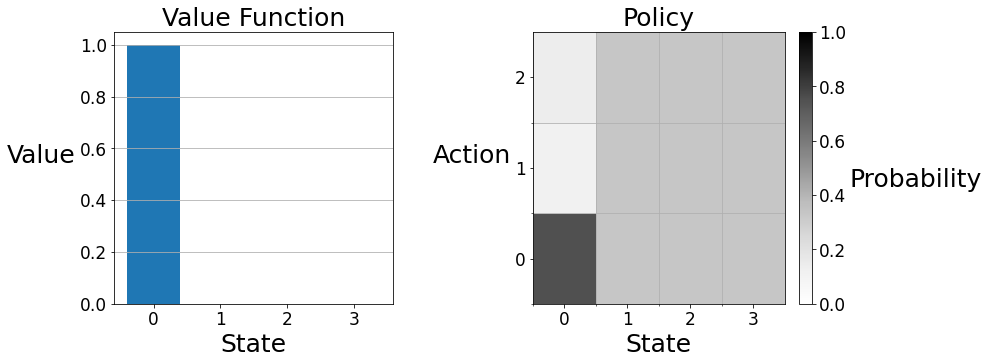

In [8]:
# On the left hand side plot, the value function is displayed as a barplot. 
# State zero has an expected return of ten, 
# while the other states have an expected return of zero. 
# On the right hand side plot, the policy is displayed on a two-dimensional 
# grid. Each vertical strip gives the policy at the labeled state. 
# In state zero, action zero is the darkest because the agent's policy makes 
# this choice with the highest probability. In the other states the agent has 
# the equiprobable policy, so the vertical strips are colored uniformly.

V[0] = 1

tools.plot(V, pi)

In [9]:
# The state space and the action set as attributes of the environment is:
env.S

[0, 1, 2, 3]

In [10]:
env.A

[0, 1, 2]

In [11]:
# The transitions method takes a state and an action and returns a 2-dimensional 
# array, where the entry at (𝑖,0) is the reward for transitioning to state 𝑖 from
# the current state and the entry at (𝑖,1) is the conditional probability of 
# transitioning to state 𝑖 given the current state and action.
state = 3
action = 1
transitions = env.transitions(state, action)
transitions

array([[1.        , 0.12390437],
       [2.        , 0.15133714],
       [3.        , 0.1848436 ],
       [2.        , 0.53991488]])

In [12]:
for sp, (r, p) in enumerate(transitions):
    print(f'p(S\'={sp}, R={r} | S={state}, A={action}) = {p.round(2)}')

p(S'=0, R=1.0 | S=3, A=1) = 0.12
p(S'=1, R=2.0 | S=3, A=1) = 0.15
p(S'=2, R=3.0 | S=3, A=1) = 0.18
p(S'=3, R=2.0 | S=3, A=1) = 0.54


In [13]:
# Policy evaluation works by iteratively applying the Bellman equation for 𝑣𝜋 
# to a working value function, as an update rule, as shown below.
def evaluate_policy(env, V, pi, gamma, theta):
    delta = float('inf')
    while delta > theta:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
            
    return V

In [14]:
def bellman_update(env, V, pi, s, gamma):
    """Mutate ``V`` according to the Bellman update equation."""
    pi_s = pi[s]
    new_V = 0
    for a,p in enumerate(pi_s):
        transitions = env.transitions(s,a)
        sum1 = 0
        for s1 in env.S:
            r = transitions[s1][0]
            p1 = transitions[s1][1]
            sum1 = sum1 + p1*(r+gamma*V[s1])
        new_V = new_V + p*sum1
    V[s] = new_V
    return V

In [15]:
# Let's use the policy evaluation algorithm to evaluate the city's policy, 
# which charges a constant price of one.

# set up test environment
num_spaces = 10
num_prices = 4
env = tools.ParkingWorld(num_spaces, num_prices)

# build test policy
city_policy = np.zeros((num_spaces + 1, num_prices))
city_policy[:, 1] = 1

gamma = 0.9
theta = 0.1

V = np.zeros(num_spaces + 1)
V = evaluate_policy(env, V, city_policy, gamma, theta)

print(V)

[80.04173399 81.65532303 83.37394007 85.12975566 86.87174913 88.55589131
 90.14020422 91.58180605 92.81929841 93.78915889 87.77792991]


In [16]:
# set up test environment
num_spaces = 10
num_prices = 4
env = tools.ParkingWorld(num_spaces, num_prices)

# build test policy
city_policy = np.zeros((num_spaces + 1, num_prices))
city_policy[:, 1] = 1

gamma = 0.9
theta = 0.1

V = np.zeros(num_spaces + 1)
V = evaluate_policy(env, V, city_policy, gamma, theta)

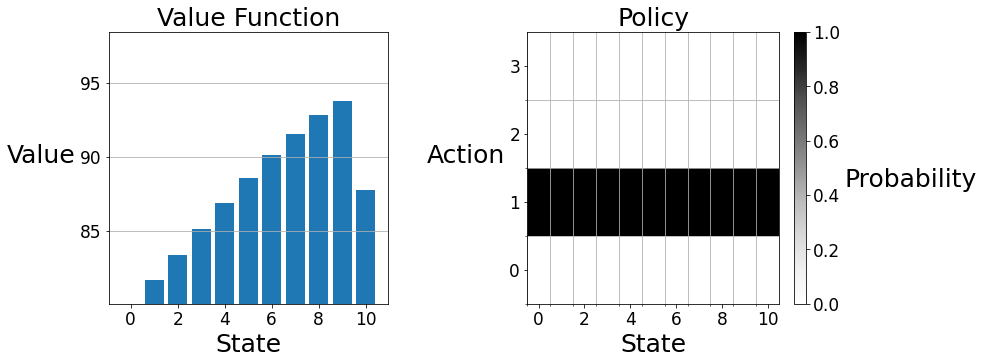

In [17]:
# Let's use the plot function to visualize the final value function and policy.
tools.plot(V, city_policy)
# Observe that the value function qualitatively resembles the city council's 
# preferences — it monotonically increases as more parking is used, 
# until there is no parking left, in which case the value is lower. 
# Because of the relatively simple reward function (more reward is accrued when 
# many but not all parking spots are taken and less reward is accrued when few
# or all parking spots are taken) and the highly stochastic dynamics function 
# (each state has positive probability of being reached each time step) the value
# functions of most policies will qualitatively resemble this graph. 
# However, depending on the intelligence of the policy, the scale of the graph 
# will differ. In other words, better policies will increase the expected return 
# at every state rather than changing the relative desirability of the states. 
# Intuitively, the value of a less desirable state can be increased by making it 
# less likely to remain in a less desirable state. Similarly, the value of a more 
# desirable state can be increased by making it more likely to remain in a more 
# desirable state. That is to say, good policies are policies that spend more time
# in desirable states and less time in undesirable states. Such a steady state 
# distribution is achieved by setting the price to be low in low occupancy states 
# (so that the occupancy will increase) and setting the price high when occupancy
# is high (so that full occupancy will be avoided).

In [18]:
# Now the city council would like you to compute a more efficient policy using 
# policy iteration. Policy iteration works by alternating between evaluating 
# the existing policy and making the policy greedy with respect to the existing
# value function. We have written an outline of the policy iteration algorithm 
# described in chapter 4.3 of the textbook. We will make use of the policy 
# evaluation algorithm previously included in this notebook. 
# The q_greedify_policy function modifies the policy at 𝑠 to be greedy with 
# respect to the q-values at 𝑠.

def improve_policy(env, V, pi, gamma):
    policy_stable = True
    for s in env.S:
        old = pi[s].copy()
        q_greedify_policy(env, V, pi, s, gamma)
        
        if not np.array_equal(pi[s], old):
            policy_stable = False
            
    return pi, policy_stable

def policy_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    policy_stable = False
    
    while not policy_stable:
        V = evaluate_policy(env, V, pi, gamma, theta)
        pi, policy_stable = improve_policy(env, V, pi, gamma)
        
    return V, pi

In [19]:
def argmax(x):
    top_value = float("-inf")
    ties = []
    for i in range(len(x)):
        if x[i] > top_value:
            ties = []
            top_value = x[i]
        if x[i] == top_value:
            ties.append(i)
    return np.random.choice(ties)

def q_greedify_policy(env, V, pi, s, gamma):
    """Mutate ``pi`` to be greedy with respect to the q-values induced by ``V``."""
    p_vec = np.zeros(len(env.A))
    for a in env.A:
        transitions = env.transitions(s,a)
        sum1 = 0
        for s1 in env.S:
            r = transitions[s1][0]
            p = transitions[s1][1]
            sum1 = sum1 + p*(r+gamma*V[s1])
        p_vec[a] = sum1
    pi[s] = np.zeros(len(env.A))
    act = argmax(p_vec)
    pi[s][act] = 1

In [20]:
gamma = 0.9
theta = 0.1
env = tools.ParkingWorld(num_spaces=6, num_prices=4)

V = np.array([7, 6, 5, 4, 3, 2, 1])
pi = np.ones((7, 4)) / 4

new_pi, stable = improve_policy(env, V, pi, gamma)

print(new_pi, stable)

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]] False


In [21]:
gamma = 0.9
theta = 0.1
env = tools.ParkingWorld(num_spaces=10, num_prices=4)

V, pi = policy_iteration(env, gamma, theta)
print(V,pi)

[81.60940117 83.28357754 85.03018628 86.79007707 88.51662023 90.16819235
 91.70422113 93.0826894  94.25817123 95.25809638 89.45397249] [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


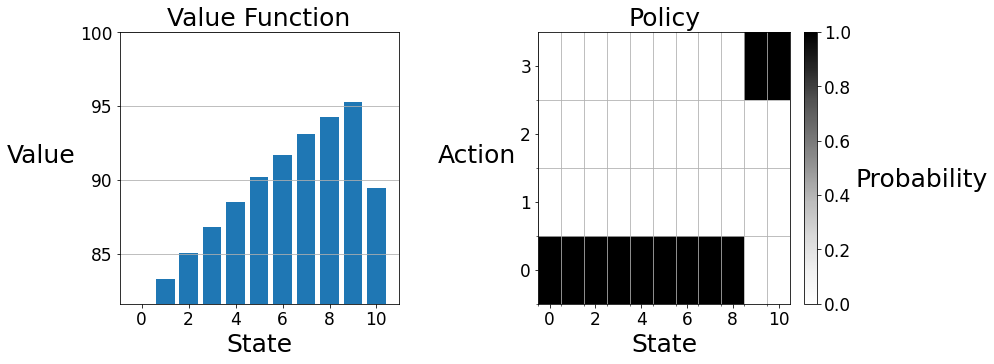

In [22]:
tools.plot(V, pi)

In [23]:
# The city has also heard about value iteration and would like you to implement
# it. Value iteration works by iteratively applying the Bellman optimality 
# equation for 𝑣∗ to a working value function, as an update rule, as shown below.
# The value iteration algorithm is described in chapter 4.4 of the textbook. 
def value_iteration(env, gamma, theta):
    V = np.zeros(len(env.S))
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            bellman_optimality_update(env, V, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    for s in env.S:
        q_greedify_policy(env, V, pi, s, gamma)
    return V, pi

In [24]:
def bellman_optimality_update(env, V, s, gamma):
    v_vec = np.zeros(len(env.A))
    for a in env.A:
        transitions = env.transitions(s,a)
        sum1 = 0
        for s1 in env.S:
            r = transitions[s1][0]
            p1 = transitions[s1][1]
            sum1 = sum1 + p1*(r+gamma*V[s1])
        v_vec[a] = sum1
    V[s] = max(v_vec)   

In [25]:
gamma = 0.9
env = tools.ParkingWorld(num_spaces=6, num_prices=4)

bellman_optimality_update(env, V, 0, gamma)

bellman_optimality_update(env, V, 2, gamma)

In [26]:
gamma = 0.9
env = tools.ParkingWorld(num_spaces=10, num_prices=4)

V = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

for _ in range(10):
    for s in env.S:
        bellman_optimality_update(env, V, s, gamma)

In [27]:
env = tools.ParkingWorld(num_spaces=10, num_prices=4)
gamma = 0.9
theta = 0.1
V, pi = value_iteration(env, gamma, theta)

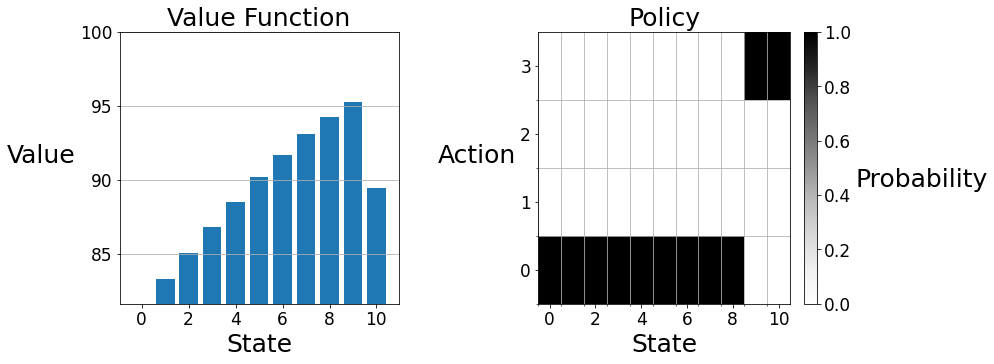

In [28]:
tools.plot(V, pi)
# In the value iteration algorithm above, a policy is not explicitly maintained
# until the value function has converged

In [29]:
# The value iteration algorithm below behaves identically to value_iteration 
# and it maintains an updated policy. Writing value iteration in this form makes
# its relationship to policy iteration more evident. Policy iteration alternates
# between doing complete greedifications and complete evaluations. 
# On the other hand, value iteration alternates between doing local greedifications 
# and local evaluations.
def value_iteration2(env, gamma, theta):
    V = np.zeros(len(env.S))
    pi = np.ones((len(env.S), len(env.A))) / len(env.A)
    while True:
        delta = 0
        for s in env.S:
            v = V[s]
            q_greedify_policy(env, V, pi, s, gamma)
            bellman_update(env, V, pi, s, gamma)
            delta = max(delta, abs(v - V[s]))
        if delta < theta:
            break
    return V, pi

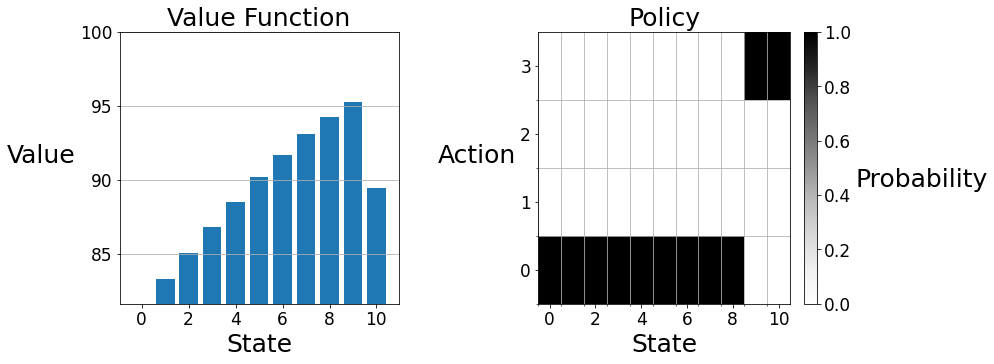

In [30]:
env = tools.ParkingWorld(num_spaces=10, num_prices=4)
gamma = 0.9
theta = 0.1
V, pi = value_iteration2(env, gamma, theta)
tools.plot(V, pi)